In [ ]:
import pandas as pd
import numpy as ny

In [ ]:
df = pd.read_csv("/content/Admission_Predict.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
clean_data = df.copy()

In [ ]:
X = clean_data.iloc[:,1:-1]

In [ ]:
Y = clean_data.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y ,train_size=0.75, random_state=40)

In [ ]:
X_train


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
189,324,112,5,5.0,5.0,9.08,1
396,325,107,3,3.0,3.5,9.11,1
299,305,112,3,3.0,3.5,8.65,0
347,299,94,1,1.0,1.0,7.34,0
282,312,106,3,4.0,3.5,8.79,1
...,...,...,...,...,...,...,...
306,323,110,3,4.0,3.5,9.10,1
165,322,110,5,4.5,4.0,8.97,0
7,308,101,2,3.0,4.0,7.90,0
219,312,104,3,3.5,3.5,8.42,0


In [ ]:
Y_train


,Chance of Admit
189,1.0
396,1.0
299,0.0
347,0.0
282,1.0
...,...
306,0.0
165,0.0
7,0.0
219,0.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=2)

In [ ]:
tree = tree.fit(X_train, Y_train)

In [ ]:
Y_pred = tree.predict(X_test)

In [ ]:
Y_pred


array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
from sklearn.metrics import accuracy_score

Acc = accuracy_score(Y_test, Y_pred)


In [ ]:
Acc

0.9

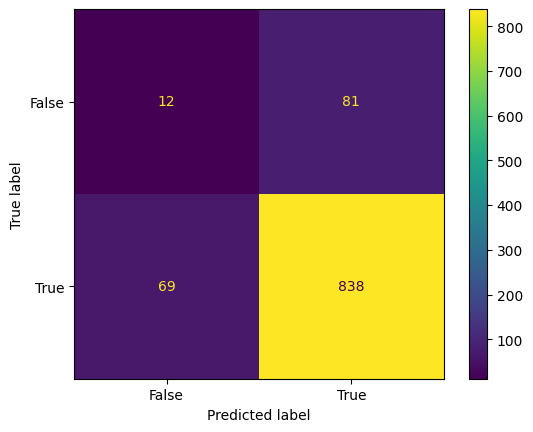

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Y_test = numpy.random.binomial(1,0.9,size = 1000)
Y_pred = numpy.random.binomial(1,0.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
Accuracy = accuracy_score(Y_test, Y_pred)
precission = precision_score(Y_pred, Y_test)
recall = recall_score(Y_pred, Y_test)

In [ ]:
Accuracy

0.85

In [ ]:
precission

0.9239250275633958

In [ ]:
from sklearn.metrics import classification_report
claf_rep = classification_report(Y_test, Y_pred, output_dict=True)

[Text(0.5, 0.8333333333333334, 'CGPA <= 8.885\ngini = 0.447\nsamples = 300\nvalue = [199, 101]'),
 Text(0.25, 0.5, 'CGPA <= 8.63\ngini = 0.097\nsamples = 195\nvalue = [185, 10]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.013\nsamples = 151\nvalue = [150, 1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.325\nsamples = 44\nvalue = [35, 9]'),
 Text(0.75, 0.5, 'GRE Score <= 319.0\ngini = 0.231\nsamples = 105\nvalue = [14, 91]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.12\nsamples = 94\nvalue = [6, 88]')]

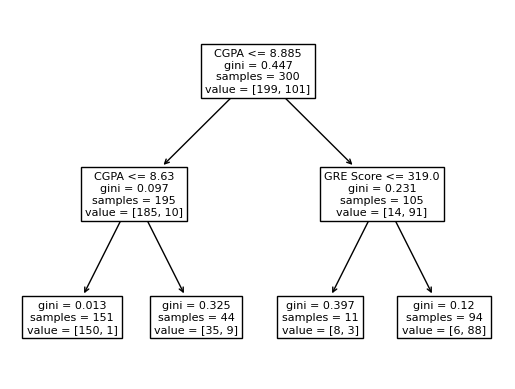

In [ ]:
from sklearn.tree import plot_tree
feature_names = ["LOR","SOP"]
ans = ["Chance of Admit "]
plot_tree(tree, feature_names=df.columns[1:-1])
# plot_tree(tree, feature_names=feature_names, class_names=ans)